<h1>Exploratory Data Analysis Project</h1>

# Table of Contents <a id='back'></a>

* [Intro](#intro)
* [0. Opening data files](#data_review)
* [1. General contents of each table](#general_contents)
    * [Conclusions](#conclusions_1)
* [2. Data preprocessing](#data_preprocessing)
    * [2.1. Data types](#data_types)
        * [2.1.1. column 'days_since_prior_order'](#column_1)
        * [2.1.2. column 'add_to_cart_order'](#column_2)
        * [Summary](#summary_1)
    * [2.2. Duplicate values](#duplicate_values)
        * [2.2.1. Obvious duplicates](#obvious)
        * [2.2.2. Unique duplicates](#unique)
        * [2.2.3. Implicit duplicates](#implicit)
            * [2.2.3.1. table 'products': column 'product_name'](#implicit_product)
            * [2.2.3.2. table 'aisles': column 'aisle'](#implicit_aisle)
            * [2.2.3.3. table 'departments': column 'department'](#implicit_department)
        * [Summary](#summary_2)
    * [2.3. Missing values](#missing_values)
        * [2.3.1. table 'orders'](#table_orders)
        * [2.3.2. table 'products'](#table_products)
        * [2.3.3. table 'order_products'](#order_products)
        * [Summary](#summary_3)   
    * [Conclusions](#conclusions_2)
* [3. Analysis](#analysis)
    * [3.1. Easy](#easy)
        * [3.1.1. Task: values' rationality](#task_1)
        * [3.1.2. Plot 1: hourly customer traffic](#plot_1)
        * [3.1.3. Plot 2: daily purchase volume](#plot_2)
        * [3.1.4. Plot 3: time between orders](#plot_3)
    * [Summary](#summary_4)
    * [3.2. Medium](#medium)
        * [3.2.1. Plot 1: order time distribution difference](#plot_4)
        * [3.2.2. Plot 2: order count distribution](#plot_5)
        * [3.2.3. Task: top 20 bestsellers](#task_2)
    * [Summary](#summary_5)
    * [3.3. Hard](#hard)
        * [3.3.1. Task 1: number of items per order](#task_3)
        * [3.3.2. Task 2: top 20 reordered items](#task_4)
        * [3.3.3. Task 3: product reorder rate](#task_5)
        * [3.3.4. Task 4: product reorder share per customer](#task_6)
        * [3.3.5. Task 5: top 20 first added items](#task_7)
        * [3.3.6. Extra: top 20 items: reordered vs first added](#extra)
    * [Summary](#summary_6)
* [Findings](#findings)

<h1>Intro</h1> <a id='intro'></a>

__Data description:__ \
This project works with data from Instacart. There are five tables in the dataset.

__Project goal:__ \
Provide a report that gives insights into shopping habits of Instacart customers.

__Customers' behavior__ is analyzed through these factors:
* order volume
* shopping duration
* product preferences

__Main steps:__
* overview of the dataframes
* data preprocessing
* EDA with graphs that communicate the results

__Tasks__
* __easy:__
    * verify values' rationality
    * plot hourly customer traffic
    * plot daily purchase volume
    * create a plot that shows time between orders
* __medium:__
    * explore the difference in order time distributions via histograms
    * plot the distribution for the number of orders that customers place
    * find the top 20 products that are ordered most frequently
* __hard:__
    * calculate the number of items per order
    * identify the top 20 items that are reordered most frequently
    * determine reorder rate of each product
    * define the proportion of products being reordered per customer
    * discover the top 20 items that people put in their carts first
    * compare the top 20 most reordered items with the top 20 items added to carts first

<h1>0. Opening data files</h1> <a id='data_review'></a>

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

 The try-except blocks are used to specify the local and common pathes to the files.

In [8]:
try:
    orders=pd.read_csv('instacart_orders.csv', sep=';')
    products=pd.read_csv('products.csv', sep=';')
    order_products=pd.read_csv('order_products.csv', sep=';')
    aisles=pd.read_csv('aisles.csv', sep=';')
    departments=pd.read_csv('departments.csv', sep=';')
except:
    orders=pd.read_csv('/datasets/instacart_orders.csv', sep=';')
    products=pd.read_csv('/datasets/products.csv', sep=';')
    order_products=pd.read_csv('/datasets/order_products.csv', sep=';')
    aisles=pd.read_csv('/datasets/aisles.csv', sep=';')
    departments=pd.read_csv('/datasets/departments.csv', sep=';')

[Back to Contents](#back)

<h1>1. General contents of each table</h1> <a id='general_contents'></a>

In [11]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


__Conclusion:__ 
* The table orders has 6 columns. 
* 1 column with missing values: days_since_prior_order.

In [13]:
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


__Conclusion:__
* The table products has 4 columns.
* 1 column with missing values: product_name.

In [15]:
order_products.info(show_counts=True)
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


__Conclusion:__
* The table order_products has 4 columns.
* 1 column with missing values: add_to_cart_order.
* The order_products.csv contains too many rows of data -> the parameter show_counts=True is included to print the non-null counts.

In [17]:
aisles.info()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


__Conclusion:__
* The table aisles has 2 columns.
* It does not have missing values.

In [19]:
departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


__Conclusion:__
* The table departments has 2 columns.
* It does not have missing values.

<h2>Conclusions</h2> <a id='conclusions_1'></a>

- 3 of 5 tables have missing values.
- 2 columns have incorrect data type.
- The dataset needs preprocessing.

[Back to Contents](#back)

<h1>2. Data preprocessing</h1> <a id='data_preprocessing'></a>

<h2>2.1. Data types</h2> <a id='data_types'></a>

To check a data type one of these approaches can be used:
* info() method: df.info()
* dtypes attribute: df.dtypes
* data type of a column: df['column_name'].dtype
* data type of a variable: type(string_date)

The info() method is already applied to all dataframes at Step 1. The data types of all columns can be found in the outputs of the method.

__Conclusion:__ 

1. The *_id columns are categorical, but they're stored as integers, since int takes less space. \
   There is no need to convert these columns to the object data type.

2. In the table orders the columns order_dow & order_hour_of_day are represented as integers. \
   Most probably they are extracted as integers from the datetime data type object. \
   There is no need to convert these columns to another data type.

All other data types are assigned correctly except for these 2 columns:

3. table orders – column days_since_prior_order (data type = float) \
This column represents the number of days since this customer placed their previous order.

__Assumption:__ Most probably this column’s data type should be int. \
But since the documentation does not provide information whether this column represents the full or partial number of days (e.g. 1.5 days), this assumption requires further exploration.

4. table order_products – column add_to_cart_order (data type = float) \
This column represents the sequential order in which each item was placed in the cart.

__Assumption:__ The sequential order implies an integer. \
So the data type in this column should be converted to int.

5. There is no need to convert the above mentioned columns into int for the analysis. But they will still be converted for the sake of practice as a part of this project.


[Back to Contents](#back)

<h3>2.1.1. column 'days_since_prior_order'</h3> <a id='column_1'></a>

Checking unique values in the column:

In [28]:
orders['days_since_prior_order'].unique()

array([30.,  9.,  2., 10., 17., 15., 22.,  4.,  8.,  3., 12., 11.,  7.,
        1.,  5.,  6., 14., nan, 20., 16., 24., 23., 27., 13.,  0., 28.,
       21., 25., 19., 18., 29., 26.])

The data type of the column is float because of the missing values. \
There are 2 ways to convert such values into int:
1. preprocess the missing values before changing the data type to int.
2. convert the column into Int64 which ignores Nan values.

Converting the column into Int64 by using the astype() method:

In [31]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype('Int64')

Control check of the column's data type after conversion:

In [33]:
orders['days_since_prior_order'].dtype

Int64Dtype()

__Conclusion:__

* The data type of the column is float because of the missing values. \
  If there are missing values in an integer column, it will force the integers to become floats as well.
* The numerical values are all whole numbers, so they can be safely converted to int.
* The column is converted into Int64 data type which ignores Nan values.

[Back to Contents](#back)

<h3>2.1.2. column 'add_to_cart_order'</h3> <a id='column_2'></a>

Checking unique values in the column:

In [37]:
order_products['add_to_cart_order'].unique()

array([17.,  1., 35.,  5.,  4., 10., 14.,  2., 28.,  3., 16.,  8.,  7.,
        6.,  9., 15., 22., 49., 19., 13., 11., 12., 18., 24., 23., 45.,
       30., 31., 29., 21., 38., 20., 57., 58., 26., 25., 39., 34., 40.,
       27., nan, 43., 33., 42., 50., 32., 36., 37., 61., 46., 56., 41.,
       44., 55., 54., 47., 63., 48., 60., 62., 53., 59., 52., 51., 64.])

Converting the column into Int64:

In [39]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64')

Control check of the column's data type:

In [41]:
order_products['add_to_cart_order'].dtype

Int64Dtype()

__Conclusion:__

* This column has the same issue as the one discussed above.
* The column is converted into Int64 data type which ignores Nan values.

<h2>Summary</h2> <a id='summary_1'></a>

- Not all data types are assigned correctly.
- 2 columns have data type float instead of int. This is due to the presence of missing values in these columns.
- The columns cannot be converted to int due to the presence of Nan values.
- The columns are converted into Int64 which ignores Nan values.

[Back to Contents](#back)

<h2>2.2. Duplicate values</h2> <a id='duplicate_values'></a>

<h3>2.2.1. Obvious duplicates</h3> <a id='obvious'></a>

Checking the dataset for fully duplicated rows using the method duplicated() \
& counting the number of duplicated rows using the method sum(). \
The custom function is used to check for obvious duplicate values in all 5 dataframes:

In [47]:
tables = [orders, products, order_products, aisles, departments]
names = ['orders', 'products', 'order_products', 'aisles', 'departments']
for table, name in zip(tables, names):
    number_duplicates = table.duplicated().sum()
    print(f'The number of duplicates in {name} is: {number_duplicates}')

The number of duplicates in orders is: 15
The number of duplicates in products is: 0
The number of duplicates in order_products is: 0
The number of duplicates in aisles is: 0
The number of duplicates in departments is: 0


__Conclusion:__
* Only the table orders has obvious duplicates (identical rows).

Removing the obvious duplicate values from the table orders using the method drop_duplicates(), \
creating a dataframe without duplicates by reassigning it back to the table orders \
and updating the indices removing the old ones, using the method reset_index(drop=True):

In [50]:
orders = orders.drop_duplicates().reset_index(drop=True)

Control check for the duplicate values in the table orders:

In [52]:
orders.duplicated().sum()

0

__Conclusion:__
* The duplicate values in the table orders are removed.
* All tables are clean from obvious duplicates.

[Back to Contents](#back)

<h3>2.2.2. Unique duplicates</h3> <a id='unique'></a>

Checking for duplicate values in columns that uniquely identify each table row. \
When a value is unique, it cannot be duplicated in a table.

In the table orders: each row corresponds to one order on the Instacart app. \
The column order_id uniquely identifies each order. \
Checking for duplicate order IDs:

In [57]:
orders.duplicated(subset=['order_id']).sum()

0

In the table products: each row corresponds to a unique product that customers can buy. \
The column product_id uniquely identifies each product. \
Checking for duplicate product IDs:

In [59]:
products.duplicated(subset=['product_id']).sum()

0

In the table order_products: each row corresponds to one item placed in an order. \
2 columns uniquely identify each table row:
- order_id uniquely identifies each order,
- product_id uniquely identifies each product.

Checking for duplicate order & products IDs:

In [61]:
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

In the table aisles, the column aisle_id  uniquely identifies each grocery aisle category. \
Checking for duplicate aisle IDs:

In [63]:
aisles.duplicated(subset=['aisle_id']).sum()

0

In the table departments the column department_id uniquely identifies each grocery department category. \
Checking for duplicate department IDs:

In [65]:
departments.duplicated(subset=['department_id']).sum()

0

__Conclusion:__
* All tables were checked for duplicate values in the ID columns that uniquely identify each row in these tables.
* No duplicates were found.

[Back to Contents](#back)

<h3>2.2.3. Implicit duplicates</h3> <a id='implicit'></a>

Implicit duplicates can occur in the object data type columns. \
There are 3 tables that have columns of the object data type:
- products: column product_name
- aisles: column aisle
- departments: column department

It is necessary to explore each of these columns separately to see if it contains implicit duplicate values.

<h4>2.2.3.1. table 'products': column 'product_name'</h4> <a id='implicit_product'></a>

Since the column contains product names, duplicates can appear due to the difference in the letter case. \
Converting product names to lowercase for correct comparison of possible duplicates:

In [70]:
products['product_name'] = products['product_name'].str.lower()

Checking the duplicate product names:

In [72]:
products.duplicated(subset=['product_name']).sum()

1361

__Assumption:__ \
Such a big number of implicit duplicate values can mean that the majority of them are missing values.

Creating a subset with these duplicates to see if there is a pattern:

In [75]:
products[products.duplicated(subset=['product_name'])]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


Checking for duplicate product names that are missing to see if the missing values are responsible for this amount of duplicates: 

In [77]:
products[(products.duplicated(subset=['product_name'])) & (products['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


The assumption was correct: 1257 values out of 1361 are duplicated rows with the missing values. \
It is better to leave these duplicated rows since the content of the missing values in them is unknown. \
The other rows with the duplicate product names that are not missing, can be dropped.

Creating a subset of the rows with the duplicate product names:

In [80]:
duplicated_names = products[(products.duplicated(subset=['product_name'])) & (products['product_name'].notna())]

Removing these rows from the table products by using the drop() method:
- the duplicated_names dataframe contains the selection of rows that need to be removed,
- the .index attribute is used to get the index labels of these rows, which are passed to the .drop() method to remove them from the original table,
- the inplace=True parameter ensures that the changes are made to the original table.

In [82]:
products.drop(duplicated_names.index, inplace = True)

Control check if the duplicated values were removed:

In [84]:
products['product_name'].info()

<class 'pandas.core.series.Series'>
Index: 49590 entries, 0 to 49687
Series name: product_name
Non-Null Count  Dtype 
--------------  ----- 
48332 non-null  object
dtypes: object(1)
memory usage: 774.8+ KB


Resetting the row index in the table products to maintain a clean and consecutive index:

In [86]:
products = products.reset_index()

__Conclusion:__
*  In the table products: the column product_name contains implicit duplicates due to the difference in the letter case of product names.
*  All product names were converted to the lowercase for the correct search of duplicates.
*  1257 duplicated values out of 1361 are duplicated rows with the missing values. These rows were not removed.
*  The other 104 rows with duplicated product names were removed.
*  The index of the table products was reset.

[Back to Contents](#back)

<h4>2.2.3.2. table 'aisles': column 'aisle'</h4> <a id='implicit_aisle'></a>

The table aisles contains 134 rows. \
Identifying the number of unique values in the column aisle by using the method nunique():

In [90]:
aisles['aisle'].nunique()

134

 Making all the letters in the strings the same case by calling the lower() method:

In [92]:
aisles['aisle'] = aisles['aisle'].str.lower()

Checking if there are no implicit duplicates due to the difference in the letter case:

In [94]:
aisles.duplicated(subset=['aisle']).sum()

0

Checking the aisle names manually to see if there are no implicit duplicates due to misspelling:

In [96]:
sorted(aisles['aisle'].unique())

['air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce',
 'canned jarred vegetables',
 'canned meals beans',
 'canned meat seafood',
 'cat food care',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'cocoa drink mixes',
 'coffee',
 'cold flu allergy',
 'condiments',
 'cookies cakes',
 'crackers',
 'cream',
 'deodorants',
 'diapers wipes',
 'digestion',
 'dish detergents',
 'dog food care',
 'doughs gelatins bake mixes',
 'dry pasta',
 'eggs',
 'energy granola bars',
 'energy sports drinks',
 'eye ear care',
 'facial care',
 'feminine care',
 'first aid',
 'food storage',
 'fresh dips tapenades',
 'fresh fruits',
 'f

__Conclusion:__
* In the table aisles: the column aisle does not contain implicit duplicates due to the difference in the letter case or due to misspelling.

[Back to Contents](#back)

<h4>2.2.3.3. table 'departments': column 'department'</h4> <a id='implicit_department'></a>

The table departments contains 21 rows. \
Using the method nunique() to identify the number of unique values in the column:

In [100]:
departments['department'].nunique()

21

Displaying the content of the column to check for implicit duplicates:

In [102]:
departments['department']

0              frozen
1               other
2              bakery
3             produce
4             alcohol
5       international
6           beverages
7                pets
8     dry goods pasta
9                bulk
10      personal care
11       meat seafood
12             pantry
13          breakfast
14       canned goods
15         dairy eggs
16          household
17             babies
18             snacks
19               deli
20            missing
Name: department, dtype: object

__Conclusion:__
* In the table departments: the column department does not contain implicit duplicates.

<h2>Summary</h2> <a id='summary_2'></a>

- Obvious duplicates: the table orders had identical rows, which were removed.
- Unique duplicates: no duplicate values were found in the ID columns of the tables.
- Implicit duplicates: 3 columns with the data type object were checked for implicit duplicated values. \
  Only the column product_name from the table products had implicit duplicates due to the difference in the letter case of product names:
  - rows where the product name has value Nan were left untouched.
  - the other rows with the duplicated product names were removed.

[Back to Contents](#back)

<h2>2.3. Missing values</h2> <a id='missing_values'></a>

3 tables have missing values:
* orders: column days_since_prior_order
* products: column product_name
* order_products: column add_to_cart_order

<h3>2.3.1. table 'orders'</h3> <a id='table_orders'></a>

__Assumption:__ \
The column days_since_prior_order contains the number of days since the customer placed his previous order. \
The values in this column can be missing due to these reasons:
1. the customer placed only 1 order, so there were no previous orders;
2. the customer placed more than 1 order, but this was his first order;
3. the values were not filled out for other reasons.
  
The column order_number contains the number of times the customer has placed an order. This column can be used to find the customers with only 1 order. \
\
To investigate the 1st assumption, it is necessary to:
* check the number of missing values in the column days_since_prior_order;
* check the number of rows with only 1 placed order;
* check the number of missing values in the rows with 1 order.

In [109]:
orders['days_since_prior_order'].isna().sum()

28817

In [110]:
orders[orders['order_number']==1].count()

order_id                  28817
user_id                   28817
order_number              28817
order_dow                 28817
order_hour_of_day         28817
days_since_prior_order        0
dtype: int64

In [111]:
orders[orders['order_number']==1].isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

__Conclusion:__ 

* The number of missing values in the column days_since_prior_order equals to the amount of purchases with only 1 order.
* The 1st assumption seems to be correct and covers all missing values. There is no need for further exploration of the assumptions #2 and #3.
* The missing values can be filled in with 0, because the number of days since prior order is 0 in this case.

Filling in the missing values with 0 using the fillna method:

In [114]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(value=0)

Control check for the missing values in the table orders:

In [116]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  Int64
dtypes: Int64(1), int64(5)
memory usage: 22.4 MB


__Conclusion:__
* All missing values in the column days_since_prior_order are filled in with 0.

[Back to Contents](#back)

<h3>2.3.2. table 'products'</h3> <a id='table_products'></a>

The column product_name contains the name of the product. \
This is a categorical variable of the data type object. \
To understand why there are missing values in this column it is necessary to take a closer look at the table products.

Calculating the number of missing values in the column product_name:

In [121]:
products['product_name'].isna().sum()

1258

Making a selection of the rows with the missing values:

In [123]:
products[products['product_name'].isna()]

,index,product_id,product_name,aisle_id,department_id
37,37,38,NaN,100,21
71,71,72,NaN,100,21
109,109,110,NaN,100,21
296,296,297,NaN,100,21
416,416,417,NaN,100,21
...,...,...,...,...,...
49454,49552,49553,NaN,100,21
49476,49574,49575,NaN,100,21
49542,49640,49641,NaN,100,21
49565,49663,49664,NaN,100,21


__Conclusion:__ \
The output shows a pattern: the missing values have aisle_id=100 and department_id=21.

__Assumption:__ \
All missing values from the column product_name are from aisle_id=100 and department_id=21.

Steps to check the assumption:
* Explore the subset of rows with aisle_id=100.
* Explore the subset of rows with department_id=21.
* Decide what to do with the missing values.

Creating a subset of rows where aisle_id is equal to 100:

In [126]:
products[products['aisle_id']==100]

,index,product_id,product_name,aisle_id,department_id
37,37,38,NaN,100,21
71,71,72,NaN,100,21
109,109,110,NaN,100,21
296,296,297,NaN,100,21
416,416,417,NaN,100,21
...,...,...,...,...,...
49454,49552,49553,NaN,100,21
49476,49574,49575,NaN,100,21
49542,49640,49641,NaN,100,21
49565,49663,49664,NaN,100,21


Checking the number of missing values for all aisle_id equal to 100:

In [128]:
products[products['aisle_id']==100].isna().sum()

index               0
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

__Conclusion:__
* All product names from the aisle_id=100 are missing.

Creating a subset of rows where department_id is equal to 21:

In [131]:
products[products['department_id']==21]

,index,product_id,product_name,aisle_id,department_id
37,37,38,NaN,100,21
71,71,72,NaN,100,21
109,109,110,NaN,100,21
296,296,297,NaN,100,21
416,416,417,NaN,100,21
...,...,...,...,...,...
49454,49552,49553,NaN,100,21
49476,49574,49575,NaN,100,21
49542,49640,49641,NaN,100,21
49565,49663,49664,NaN,100,21


Checking the number of missing values for all department_id equal to 21:

In [133]:
products[products['department_id']==21].isna().sum()

index               0
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

__Conclusion:__
* All product names from the department_id=21 are missing.

Further steps:
* The assumption is correct.
* It is necessary to have a look at aisle_id = 100 (tables aisles) and department_id = 21 (table departments) to see if the missing values can be restored.

In [136]:
aisles[aisles['aisle_id']==100]

,aisle_id,aisle
99,100,missing


In [137]:
departments[departments['department_id']==21]

,department_id,department
20,21,missing


__Conclusion:__
* Both aisle_id=100 and department_id=21 are missing.
* Assumption: if a product cannot be categorized or it is not possible to find where the product is stored, then its aisle and department are marked as missing.
* Thus, the missing values in the column product_name cannot be restored.
* In this case the missing values can be best filled in as unknown.

Filling in the missing values with 'unknown' using the fillna method:

In [140]:
products['product_name']=products['product_name'].fillna('unknown')

Control check for the missing values in the column product_name of the table products:

In [142]:
products['product_name'].isna().sum()

0

__Conclusion:__
* All missing values in the column product_name are filled in with 'unknown'.

[Back to Contents](#back)

<h3>2.3.3. table 'order_products'</h3> <a id='order_products'></a>

The column add_to_cart_order contains the sequential order in which each item was placed in the cart. \
To understand why there are missing values in this column it is necessary to:
- Take a closer look at the table order_products.
- Explore the connection between add_to_cart_order and other columns in the table to see if they’re responsible for the missing values.
- Check the unique values in the column itself.

Calculating the number of missing values in the column add_to_cart_order:

In [147]:
order_products['add_to_cart_order'].isna().sum()

836

Making a selection of the rows with the missing values:

In [149]:
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


__Conclusion:__
* The table does not show any patterns for missing values.

Checking the unique values in the column add_to_cart_order sorted in ascending order:

In [152]:
order_products['add_to_cart_order'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,   37,   38,   39,
   40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,   52,
   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64, <NA>]
Length: 65, dtype: Int64

__Conclusion:__
* The range of values is between 1 and 64.
* Each value between 1 and 64 is represented in the column.

__Assumption:__
The values that exceed 64 products in one order might be represented as missing.

To check the assumption it is necessary to:
* Look at orders that have missing values in the column add_to_cart_order.
* Investigate the column order_id that uniquely identifies each order.
* Investigate the column product_id that uniquely identifies each product.
* Calculate how many products has each order where the values are missing.

Creating a subset where add_to_cart_order values are missing.

In [156]:
subset_missing = order_products[order_products['add_to_cart_order'].isna()]
subset_missing

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


Creating an array of unique order IDs with at least one missing value in the add_to_cart_order column:

In [158]:
orders_missing = subset_missing['order_id'].unique()
orders_missing.size

70

Now there are order IDs for each row where the values are missing.

Filtering the dataset based on this array to create a subset, where order_id belongs to the rows with missing values:

In [160]:
subset_orders = order_products[order_products.order_id.isin(orders_missing)]

Now it is possible to count how many products each of these orders contains.

The subset is grouped by order_id and the number of unique products is calculated for every order_id that has missing values. \
Calculating the amount of products per each order:

In [162]:
subset_orders.groupby('order_id')['product_id'].nunique().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Now for every order_id there is the amount of products within this order. \
The column is sorted in the ascending order. \
The minimum value is 65.

__Conclusion:__
* There are 70 unique orders with missing values in the column add_to_cart_order, and all of them have more than 64 products per order.
* All orders with missing values have more than 64 products.
* The assumption was correct.
* A possible reason for this: if there are too many products in one order, the system cannot keep up, cannot count them correctly and freezes.
* The missing values in the column add_to_cart_order cannot be guessed or restored from other columns.
* Replacing these values with any value can lead to incorrect calculations in further analysis.
* The missing values in the column add_to_cart_order are left as they are.

[Back to Contents](#back)

Control check if working with the missing values did not create duplicated rows:

In [166]:
tables = [orders, products, order_products, aisles, departments]
names = ['orders', 'products', 'order_products', 'aisles', 'departments']
for table, name in zip(tables, names):
    number_duplicates = table.duplicated().sum()
    print(f'The number of duplicates in {name} is: {number_duplicates}')

The number of duplicates in orders is: 0
The number of duplicates in products is: 0
The number of duplicates in order_products is: 0
The number of duplicates in aisles is: 0
The number of duplicates in departments is: 0


<h2>Summary</h2> <a id='summary_3'></a>

The missing values were processed in this way:
- table orders - column days_since_prior_order: filled in with 0.
- table products - column product_name: filled in with 'unknown'.
- table order_products - column add_to_cart_order: left as they are.

The final check for duplicated rows did not reveal any.

<h2>Conclusions</h2> <a id='conclusions_2'></a>

- The dataset is fully preprocessed:
    - data types adjusted.
    - duplicate values removed.
    - missing values filled in, except for the table order_products, where they were left as they are.
- The dataset is ready for the analysis.

[Back to Contents](#back)

<h1>3. Analysis</h1> <a id='analysis'></a>

<h2>3.1. Easy</h2> <a id='easy'></a>

<h3>3.1.1. Task: values' rationality</h3> <a id='task_1'></a>

Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible \
(i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).

The method unique() is used to display all unique values in each of these columns.\
The values are also sorted in the ascending order using the method sort_values().

In [174]:
orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [175]:
orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

__Conclusion:__
* The values in both columns are sensible.
* The are no strange or missing values in these columns.

[Back to Contents](#back)

<h3>3.1.2. Plot 1: hourly customer traffic</h3> <a id='plot_1'></a>

Create a plot that shows how many people place orders for each hour of the day.

To calculate the number of people buying at each hour of the day:
* the table orders is grouped by the column order_hour_of_day to combine data for each hour separately, 
* the number of unique user_id is calculated for each hour of the day. \
  If a customer placed several orders within one hour - he should be counted as one person.

In [180]:
customers_per_hour = orders.groupby('order_hour_of_day')['user_id'].nunique()
customers_per_hour.sort_values()

order_hour_of_day
4       735
3       744
2       958
5      1281
1      1671
0      2991
6      3757
23     5167
22     7670
21     9806
7     10993
20    12891
19    17026
8     20268
18    21795
17    26825
9     28112
16    31579
12    31754
10    32195
13    32433
11    32660
14    32797
15    32894
Name: user_id, dtype: int64

Using the pandas function plot() to create a bar chart that shows how many people place orders for each hour of the day.

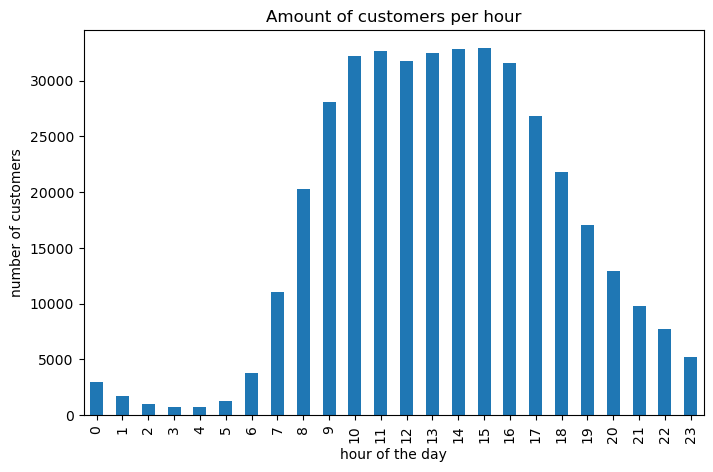

In [182]:
customers_per_hour.plot(xlabel='hour of the day', ylabel='number of customers', kind='bar', title="Amount of customers per hour", figsize=[8, 5])
plt.show()

__Conclusion:__
* The peak hours for making purchases are from 10 till 16.
* The least number of orders is placed between 2 and 4 at night.

[Back to Contents](#back)

<h3>3.1.3. Plot 2: daily purchase volume</h3> <a id='plot_2'></a>

Create a plot that shows what day of the week people shop for groceries.

To calculate the amount of purchases for each weekday, the function value_counts() is used on the column order_dow (day of the week that the order placed):

In [187]:
orders['order_dow'].value_counts()

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: count, dtype: int64

Using the matplotlib.pyplot library to create a histogram that shows how many orders are placed for each day of the week.

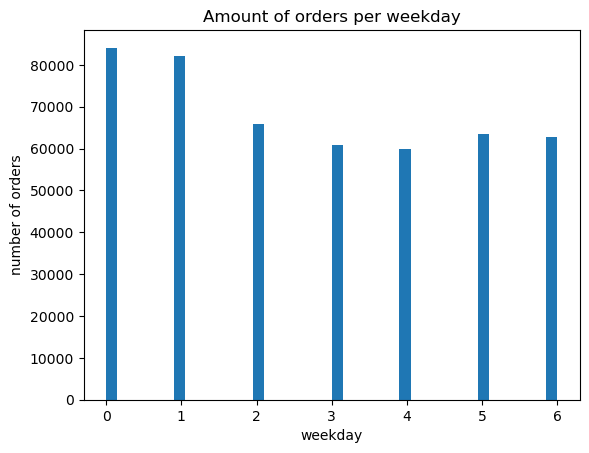

In [189]:
orders['order_dow'].plot(x='order_dow', kind='hist', xlabel="weekday", ylabel="number of orders", title='Amount of orders per weekday', bins=40)
plt.show()

__Conclusion:__
* The most purchases are made on Sundays (weekday=0) and Mondays (weekday=1)*.
* The least amount of purchases are made on Wednesdays (weekday=3) and Thursdays (weekday=4).

<a id='task3.1.3'></a>

*To determine what integers correspond to each day of the week, it is neccesary to:
1. check the range of values in the column order_dow. \
   The range of values in the column order_dow is from 0 to 6. \
    The Python datetime module’s convention for naming weekdays:
    * Monday=0 and Sunday=6 (weekday() method)
    * Monday=1 and Sunday=7 (isoweekday() method)
3. check the local date/time formatting. \
   Instacart is an American delivery company that operates in the United States and Canada. \
   In the USA a week starts on Sunday (Sunday=0)

__Assumption:__
* It is not possible to determine exactly how weekdays are numbered in this dataframe.
* The weekday formatting is most likely local.
* Sunday=0

[Back to Contents](#back)

<h3>3.1.4. Plot 3: time between orders</h3> <a id='plot_3'></a>

Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.

In the table orders, the column days_since_prior_order shows the number of days since a customer placed his previous order. \
Using the describe() method to understand the distribution of values in the column days_since_prior_order. 

In [194]:
orders['days_since_prior_order'].describe()

count     478952.0
mean     10.433853
std       9.292153
min            0.0
25%            4.0
50%            7.0
75%           15.0
max           30.0
Name: days_since_prior_order, dtype: Float64

Having a closer look at the column:
* the function value_counts() calculates the amount of orders for each waiting period,
* the values are sorted in the descending order, with the highest waiting period at the top.

In [196]:
orders['days_since_prior_order'].sort_values().value_counts()

days_since_prior_order
30    51337
7     44577
0     38406
6     33930
4     31006
3     30224
5     30096
2     27138
8     25361
1     20179
9     16753
14    13992
10    13309
13    11737
11    11467
12    10658
15     9416
16     6587
21     6448
17     5498
20     5302
18     4971
19     4939
22     4514
28     3745
23     3337
24     3015
27     2986
25     2711
29     2673
26     2640
Name: count, dtype: Int64

Using the matplotlib.pyplot library to create a histogram that shows how long people wait until placing their next order. \
The function xticks allows to set a step for the x-axis ticks.

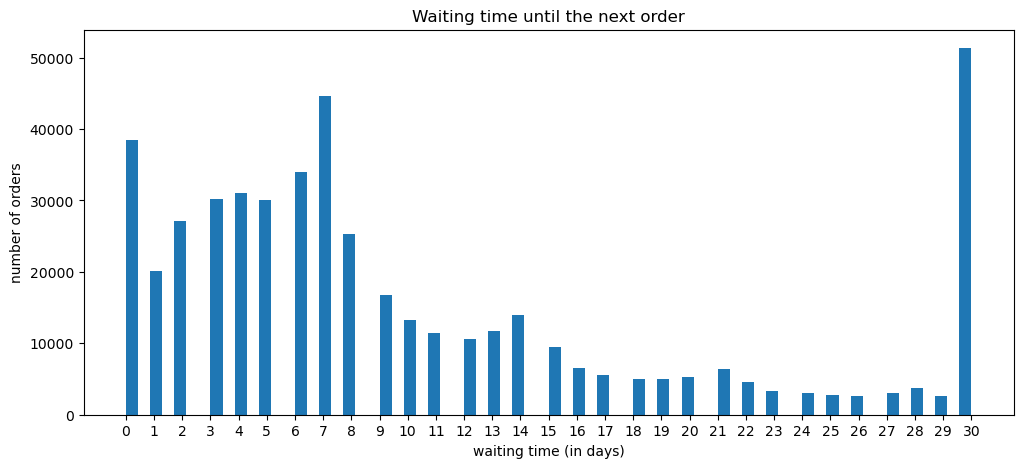

In [198]:
orders['days_since_prior_order'].plot(x='days_since_prior_order', kind='hist', xlabel="waiting time (in days)", ylabel="number of orders", title='Waiting time until the next order', bins=70, figsize=[12, 5])
plt.xticks(np.arange(0, 31, step=1))
plt.show()

__Conclusion:__
* The minimum value: 0 days \
  Waiting time of 0 days means that the next order is placed on the same day as the previous order. \
  The number of orders placed in one day is the third highest among the total number of orders.
* The maximum value: 30 days \
  It means the next order was placed 30 days after the previous order. \
  The majority of people waits for 30 days until placing their next order. \
  The enormously high amount of orders for the waiting time=30 can mean that the values above 30 are not put into a separate category by the system, and all orders made after 30 days are put into the same category '30'. So it means that most people wait for 30 days and more before placing a new order.
* Half of the customers waits for 7 days before making a new purchase.
* On average (mean) the waiting time is 10 days. But this is because there is an outlier – 30 days.

<h2>Summary</h2> <a id='summary_4'></a>

The shopping habits of Instacart customers:
- Most customers make purchases on Sundays and Mondays, and from 10 till 16 o'clock.
- The least number of orders is placed on Wednesdays and Thursdays, and between 2 and 4 at night.
- For the weekday values there was made an assumption that Sunday=0, based on the local USA date formatting.
- The majority of people waits for 30 days until placing their next order.
- At the same time, the number of orders placed on the same day is the third highest among the total number of orders.
- Half of the customers waits for 7 days before making a new purchase.

[Back to Contents](#back)

<h2>3.2. Medium</h2> <a id='medium'></a>

<h3>3.2.1. Plot 1: order time distribution difference</h3> <a id='plot_4'></a>

Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? \
Plot the histograms for both days on the same plot and describe the differences.

According to the assumption made in the task [3.1.3. Plot 2](#task3.1.3): \
Sunday=0 \
Wednesday=3 \
Saturday=6

Filtering the dataframe to leave only data for Wednesdays and Saturdays:

In [206]:
wed = orders[orders['order_dow']==3]['order_hour_of_day']
sat = orders[orders['order_dow']==6]['order_hour_of_day']

Exploring the difference in distributions of Wednesday and Saturday orders among hours of the day, using the describe() method:

In [208]:
wed_sat = orders[orders.order_dow.isin([3,6])]
wed_sat.groupby(['order_dow'])['order_hour_of_day'].describe()

,count,mean,std,min,25%,50%,75%,max
order_dow,,,,,,,,
3,60897.0,13.531241,4.258216,0.0,10.0,13.0,17.0,23.0
6,62649.0,13.536050,4.263393,0.0,10.0,13.0,16.0,23.0


Exploring the difference in distributions via histograms, using the matplotlib.pyplot library. \
An alpha value is used to set the transparency, so that both histograms are visible. \
The function xticks is used to set a step for the x-axis ticks.

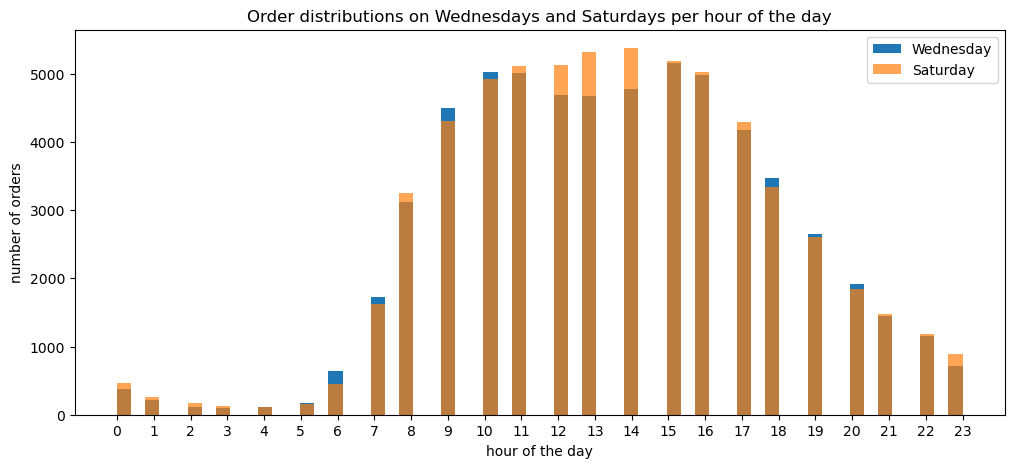

In [210]:
wed.plot(xlabel='hour of the day', ylabel='number of orders', title='Order distributions on Wednesdays and Saturdays per hour of the day', kind='hist', bins=60, figsize=[12, 5])
sat.plot(xlabel='hour of the day', ylabel='number of orders', title='Order distributions on Wednesdays and Saturdays per hour of the day', kind='hist', bins=60, alpha=0.7, figsize=[12, 5])
plt.xticks(np.arange(0, 24, step=1))
plt.legend(['Wednesday', 'Saturday'])
plt.show()

__Conclusion:__
* The distribution is the same:
    * On average people shop around 13 o'clock on Wednesdays and Saturdays.
    * The order window (the hours when orders are made) is the same for both days.
* The difference is in the number of orders:
    * The number of orders is bigger for Saturday.
    * On Saturdays there are more orders between 11 and 17 o'clock then on Wednesdays. \
      On Wednesdays there are more orders in the morning (6, 7, 9, 10) and in the evening (18, 19, 20) hours then on Saturdays. \
      This can be due to the work-weekend schedule:
      * during workweeks people place orders before going to work and after coming home from work.
      * during weekends people tend to sleep longer (less orders in the morning) and place orders mostly during the day hours.

[Back to Contents](#back)

<h3>3.2.2. Plot 2: order count distribution</h3> <a id='plot_5'></a>

Plot the distribution for the number of orders that customers place \
(e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)

In the table orders the column order_number contains the number of times a customer has placed an order, in other words the number of orders per customer. \
Checking the distribution for the number of orders, using the describe() method:

In [215]:
orders['order_number'].describe()

count    478952.000000
mean         17.157563
std          17.704457
min           1.000000
25%           5.000000
50%          11.000000
75%          23.000000
max         100.000000
Name: order_number, dtype: float64

The range of values is between 1 and 100. So the amount of orders per customer varies from 1 to 100. \
To calculate how many customers are there for each order number:
* the table orders is grouped by the column order_number to combine data for each number of orders separately, 
* the number of unique user_id is calculated for each number of orders.

In [217]:
customers_per_order_number=orders.groupby('order_number')['user_id'].nunique()
customers_per_order_number

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

Creating a bar chart to show how many people place a particular number of orders.

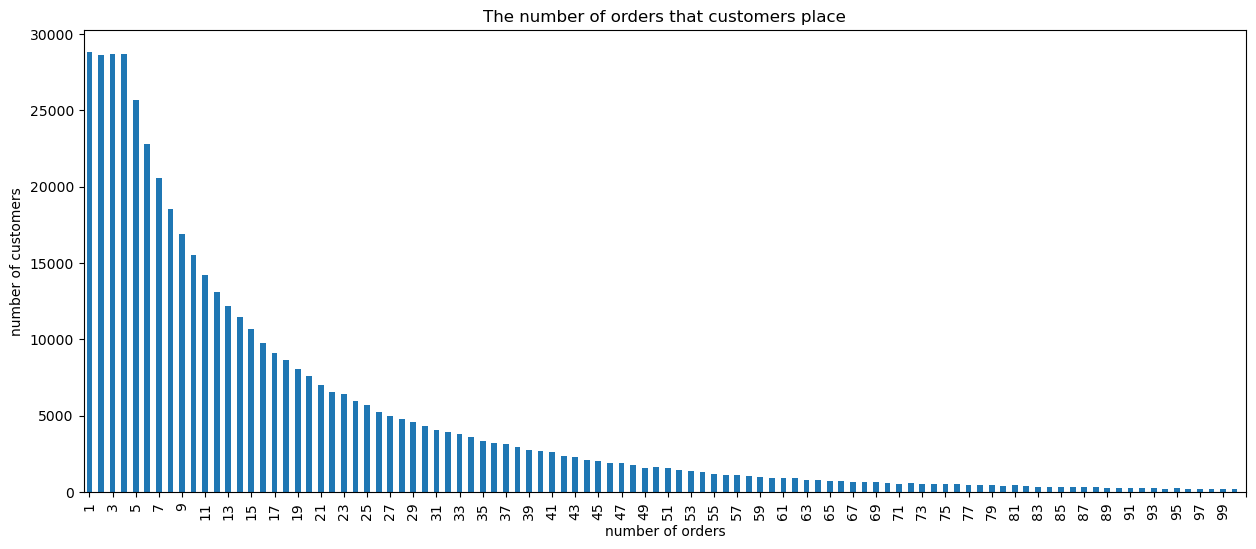

In [219]:
customers_per_order_number.plot(xlabel='number of orders', ylabel='number of customers', title="The number of orders that customers place", kind='bar', figsize=[15, 6])
plt.xticks(np.arange(0, 101, step=2))
plt.show()

__Conclusion:__
* The amount of customers reduces as the number of orders increases.
* The majority of customers place 1 to 4 orders.
* Only a small amount of customers make more than 50 orders.

[Back to Contents](#back)

<h3>3.2.3. Task: top 20 bestsellers</h3> <a id='task_2'></a>

What are the top 20 products that are ordered most frequently (display their id and name)?

In the table order_products each row corresponds to one product placed in an order. \
To determine the 20 products that are ordered most frequently, it is necessary to:
* group the dataframe by product,
* calculate how many times each product is added to the order,
* sort the values in descending order, so that the most frequently ordered products will be at the top,
* make a selection of only the top 20 products.

In [224]:
product_popularity=order_products.groupby('product_id')['order_id'].nunique().sort_values(ascending=False)

In [225]:
most_popular=product_popularity[0:20]
most_popular

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: order_id, dtype: int64

To display the most popular product names together with their id, it is necessary to:
* save the index (=product_id) of the most popular products as a list,
* use the table products, where the names of the products are stored,
* use the query to filter the table products by the most popular product IDs.

In [227]:
popular_product_index=most_popular.index

In [228]:
products.query('product_id in @popular_product_index')[['product_id', 'product_name']]

,product_id,product_name
5872,5876,organic lemon
8272,8277,apple honeycrisp organic
13168,13176,bag of organic bananas
16786,16797,strawberries
21117,21137,organic strawberries
21883,21903,organic baby spinach
22914,22935,organic yellow onion
24826,24852,banana
24938,24964,organic garlic
26181,26209,limes


__Conclusion:__
* 20 most frequently ordered products were found, using grouping and the query() method.
* This method sorts the result by product_id, so it is not clear what is the most popular product.
* The other option would be to use the value_counts() function and merging of the tables to find the top 20 products. \
  In this case the result is sorted by counts, so it is possible to see what is the most popular product.


<h2>Summary</h2> <a id='summary_5'></a>

The shopping habits of Instacart customers:
- The distribution of orders at each hour of the day on Wednesdays and Saturdays is the same:
  - the order window is the same for both days,
  - on average people shop around 13 o'clock on Wednesdays and Saturdays.
- There is a difference in the number of orders during these days:
    - on Saturdays there are more orders than on Wednesdays in general,
    - on Saturdays there are more orders between 11 and 17 o'clock in comparison to Wednesdays,
    - on Wednesdays there are more orders in the morning and evening hours in comparison to Saturdays.
- The distribution for the number of orders that customers place shows descending trend: \
  As the number of orders increases, the number of distinct customers associated with each number of orders decreases.
- Most customers place 1 to 4 orders, with only a small amount of customers making more than 50 orders.
- 20 most frequently ordered products were found and displayed with both their name and product id.

[Back to Contents](#back)

<h2>3.3. Hard</h2> <a id='hard'></a>

<h3>3.3.1. Task 1: number of items per order</h3> <a id='task_3'></a>

How many items do people typically buy in one order? \
What does the distribution look like?

In the table order_products each row corresponds to one item placed in an order. \
To find how many items people buy in one order, it is necessary to:
- group the data by order_id, so that each group contains all products associated with a particular order,
- calculate the number of products associated with each order.

In [235]:
products_per_order = order_products.groupby('order_id')['product_id'].count()
products_per_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

Checking the distribution of the number of items per order, using the describe() method:

In [237]:
products_per_order.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

A histogram is used to display the distribution of the number of products per order:

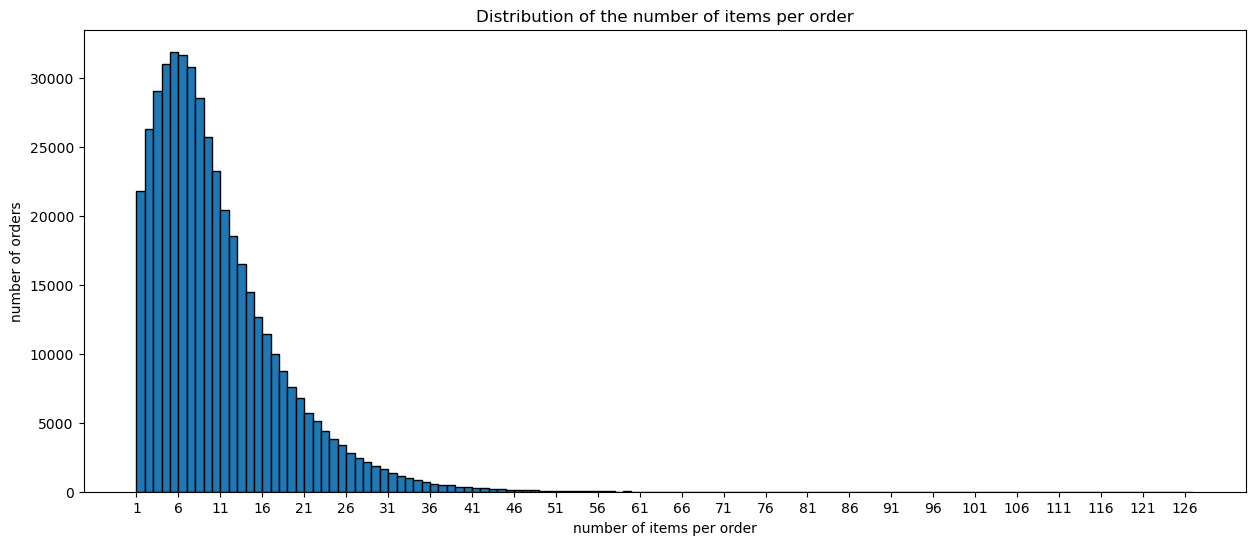

In [239]:
plt.figure(figsize=(15, 6))
products_per_order.plot(kind='hist', bins=range(1, products_per_order.max() + 1), edgecolor='black')
plt.xlabel('number of items per order')
plt.ylabel('number of orders')
plt.title('Distribution of the number of items per order')
plt.xticks(np.arange(1, products_per_order.max() + 1, step=5))
plt.show()

__Conclusion:__
* People typically buy 8 items in one order, judging by the median value.
* The distribution is right-skewed: there is a peak on the left side with a gradual decline as the number of items per order increases.
* In a right skewed distribution, the mean is greater than the median:
    * mean: 10
    * median: 8
* Most orders consist of a small amount of items, and fewer orders contain lots of items.

[Back to Contents](#back)

<h3>3.3.2. Task 2: top 20 reordered items</h3> <a id='task_4'></a>

What are the top 20 items that are reordered most frequently? \
Display their names and product IDs.

In the table order_products each row corresponds to one item placed in an order. \
To determine the 20 items that are reordered most frequently, it is necessary to:
* group the dataframe by item,
* calculate item popularity by summing how many times it was reordered,
* sort the values in descending order, so that the most frequently reordered items will be at the top,
* make a selection of only the top 20 items.

In [244]:
item_popularity=order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False)
item_popularity

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
37593        0
14775        0
37596        0
14774        0
13714        0
Name: reordered, Length: 45573, dtype: int64

In [245]:
most_popular_items=item_popularity[0:20]
most_popular_items

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: reordered, dtype: int64

To display the most frequently reordered item names together with their IDs, it is necessary to:
* save the index (=product_id) of the most popular items as a list,
* use the table products, where the names of the items are stored,
* use the query to filter the table products by the most popular item IDs.

In [247]:
popular_item_index=most_popular_items.index

In [248]:
top20 = products.query('product_id in @popular_item_index')[['product_id', 'product_name']]
top20

,product_id,product_name
5872,5876,organic lemon
8272,8277,apple honeycrisp organic
13168,13176,bag of organic bananas
16786,16797,strawberries
21117,21137,organic strawberries
21883,21903,organic baby spinach
22914,22935,organic yellow onion
24826,24852,banana
24938,24964,organic garlic
26181,26209,limes


To sort the result by counts (i.e., how many times the item was reordered), it is necessaty to:
* set_index('product_id').reindex(popular_item_index) \
  to reindex top20 to match the order of popular_item_index, ensuring that the items are sorted according to their popularity counts.
* reset_index() \
  so that product_id is a column again.

This will ensure that the result is sorted, based on the reorder counts.

In [250]:
most_popular_items_sorted = top20.set_index('product_id').reindex(popular_item_index).reset_index()
most_popular_items_sorted

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,27845,organic whole milk
7,47626,large lemon
8,27966,organic raspberries
9,16797,strawberries


__Conclusion:__
* The top 20 items that are reordered most frequently were determined, using grouping and the query() method.
* The result displays both their names and IDs.
* The result is sorted by reorder counts, with the most frequently reordered item at the top.

[Back to Contents](#back)

<h3>3.3.3. Task 3: product reorder rate</h3> <a id='task_5'></a>

For each product, what proportion of its orders are reorders? \
Create a table with columns for the product ID, product name, and reorder proportion.

In the table order_products each row corresponds to one product placed in an order. \
To determine the proportion of reorders to orders for each product, it is necessary to:
* group the dataframe by product,
* calculate how many times each product is ordered,
* calculate how many times each product is reordered,
* find a proportion of the product's reorders to its orders.

In [255]:
total_orders = order_products.groupby('product_id')['reordered'].count()
total_orders

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: reordered, Length: 45573, dtype: int64

In [256]:
reorders = order_products.groupby('product_id')['reordered'].sum()
reorders

product_id
1        158
2          0
3         31
4         25
7          1
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: reordered, Length: 45573, dtype: int64

In [257]:
proportion = (reorders/total_orders)*100
proportion

product_id
1        56.428571
2         0.000000
3        73.809524
4        51.020408
7        50.000000
           ...    
49690    80.000000
49691    43.055556
49692    41.666667
49693    44.000000
49694    33.333333
Name: reordered, Length: 45573, dtype: float64

The concat() function is used to create a table with:
* product_id
* how many times each product is ordered and reordered
* reorders rate

Since all 3 calculations (total_orders, reorders, proportion) have the same number of rows and share the same index (=product_id), it is possible to create a table from them, using the concat() function:
* The parameter axis=1 is used to combine data column-wise.
* The method reset_index() is used to treat the product_id index as a column in the new table.
* The attribute .columns is used to rename columns after concatenation.

In [259]:
table=pd.concat([total_orders, reorders, proportion], axis=1).reset_index()
table.columns = ['product_id', 'total_orders', 'reorders', 'reorder_rate']
table

,product_id,total_orders,reorders,reorder_rate
0,1,280,158,56.428571
1,2,11,0,0.000000
2,3,42,31,73.809524
3,4,49,25,51.020408
4,7,2,1,50.000000
...,...,...,...,...
45568,49690,5,4,80.000000
45569,49691,72,31,43.055556
45570,49692,12,5,41.666667
45571,49693,25,11,44.000000


Merging the table with the products dataframe to get the product_name for each product_id. \
The [[]] are used to specify the columns that are needed from both tables in the resulting dataframe.

In [261]:
result=table[['product_id', 'reorder_rate']].merge(products[['product_id', 'product_name']], on='product_id', how='left')
result

,product_id,reorder_rate,product_name
0,1,56.428571,chocolate sandwich cookies
1,2,0.000000,all-seasons salt
2,3,73.809524,robust golden unsweetened oolong tea
3,4,51.020408,smart ones classic favorites mini rigatoni wit...
4,7,50.000000,pure coconut water with orange
...,...,...,...
45568,49690,80.000000,NaN
45569,49691,43.055556,NaN
45570,49692,41.666667,NaN
45571,49693,44.000000,NaN


__Conclusion:__
* For each product, its reorder rate is calculated.
* A table is created with product ID, product name, and reorder proportion.

[Back to Contents](#back)

<h3>3.3.4. Task 4: product reorder share per customer</h3> <a id='task_6'></a>

For each customer, what proportion of their products ordered are reorders?

In other words, for each customer: from all the products that he ordered, how many are reordered again?

In the table orders, the column user_id uniquely identifies each customer account. \
In the table order_products, the column product_id uniquely identifies each product.

To determine the proportion of products being reordered per customer, it is necessary to:
* merge 2 dataframes to have access to both customer ID and the products that he orders,
* group the merged dataframe by customer,
* calculate the total amount of products ordered by each customer,
* calculate how many products were reordered again by this customer,
* find a proportion of the product's reorders to its orders for each customer.

In [267]:
customer_products=orders[['order_id', 'user_id']].merge(order_products[['order_id', 'product_id', 'reordered']], on='order_id', how='left')
customer_products

,order_id,user_id,product_id,reordered
0,1515936,183418,19048.0,1.0
1,1515936,183418,47766.0,1.0
2,1515936,183418,45066.0,0.0
3,1515936,183418,24082.0,0.0
4,1515936,183418,24363.0,0.0
...,...,...,...,...
4573908,2071924,1730,1503.0,0.0
4573909,2071924,1730,4778.0,1.0
4573910,2071924,1730,11512.0,1.0
4573911,2071924,1730,4920.0,1.0


Checking if merging did not create duplicated rows:

In [269]:
customer_products.duplicated().sum()

0

Calculating the number of unique customers in the dataset. \
This number can be used as a control number for verifying the further calculations.

In [271]:
customer_products['user_id'].nunique()

157437

Counting the number of products ordered per customer:

In [273]:
customer_orders = customer_products.groupby('user_id')['reordered'].count()
customer_orders

user_id
2          26
4           2
5          12
6           4
7          14
         ... 
206203     27
206206     21
206207     46
206208    125
206209     25
Name: reordered, Length: 157437, dtype: int64

Calculating how many products were reordered per customer:

In [275]:
customer_reorders = customer_products.groupby('user_id')['reordered'].sum()
customer_reorders

user_id
2          1.0
4          0.0
5          8.0
6          0.0
7         13.0
          ... 
206203     6.0
206206    15.0
206207    41.0
206208    87.0
206209     8.0
Name: reordered, Length: 157437, dtype: float64

Finding the products reorder share for each customer:

In [277]:
reorders_share=(customer_reorders/customer_orders)*100
reorders_share

user_id
2          3.846154
4          0.000000
5         66.666667
6          0.000000
7         92.857143
            ...    
206203    22.222222
206206    71.428571
206207    89.130435
206208    69.600000
206209    32.000000
Name: reordered, Length: 157437, dtype: float64

Creating a table with the results:

In [279]:
reorders_table=pd.concat([customer_orders, customer_reorders, reorders_share], axis=1).reset_index()
reorders_table.columns = ['user_id', 'product_orders', 'product_reorders', 'reorders_share']
reorders_table

,user_id,product_orders,product_reorders,reorders_share
0,2,26,1.0,3.846154
1,4,2,0.0,0.000000
2,5,12,8.0,66.666667
3,6,4,0.0,0.000000
4,7,14,13.0,92.857143
...,...,...,...,...
157432,206203,27,6.0,22.222222
157433,206206,21,15.0,71.428571
157434,206207,46,41.0,89.130435
157435,206208,125,87.0,69.600000


__Conclusion:__
* For each customer, the products reorder rate is calculated.
* A table is created with user_id, the number of products ordered & reordered, and the reorders share.

[Back to Contents](#back)

<h3>3.3.5. Task 5: top 20 first added items</h3> <a id='task_7'></a>

What are the top 20 items that people put in their carts first? \
Display the product IDs, product names, and number of times they were the first item added to the cart.

In the table order_products, the column add_to_cart_order displays the sequential order in which each item was placed in the cart.

Making a selection of the products that were put in the carts first:

In [285]:
first_in_cart=order_products[order_products['add_to_cart_order']==1]
first_in_cart

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
...,...,...,...,...
4544978,1759009,46175,1,0
4544989,115427,20842,1,1
4544990,2049780,28576,1,1
4544997,2300092,10017,1,0


Calculating how many times each product is added to a cart as first, \
and sorting the results in the descending order, so the products that are most frequently added as the first ones are at the top:

In [287]:
first_products = first_in_cart.groupby('product_id')['order_id'].count().sort_values(ascending=False)
first_products

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
         ...  
10981        1
10985        1
38272        1
10989        1
36996        1
Name: order_id, Length: 26760, dtype: int64

Testing if the values are correct, e.g. for the product with id=24852:

In [289]:
test=order_products[order_products['product_id']==24852]['add_to_cart_order']==1
test.value_counts()

add_to_cart_order
False    50484
True     15562
Name: count, dtype: Int64

Making a selection of the 20 items that people put in their carts first:

In [291]:
first_20_products=first_products[0:20]
first_20_products

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: order_id, dtype: int64

Creating a table of the top 20 items with their product_id and the number of times they were the first item added to the cart:

In [293]:
table_20_products=first_20_products.reset_index()
table_20_products.columns = ['product_id', 'how_often_first']
table_20_products

,product_id,how_often_first
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


Merging the table with the dataframe products to receive the names for these top 20 items:

In [295]:
top_20_products=table_20_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')
top_20_products

,product_id,how_often_first,product_name
0,24852,15562,banana
1,13176,11026,bag of organic bananas
2,27845,4363,organic whole milk
3,21137,3946,organic strawberries
4,47209,3390,organic hass avocado
5,21903,3336,organic baby spinach
6,47766,3044,organic avocado
7,19660,2336,spring water
8,16797,2308,strawberries
9,27966,2024,organic raspberries


__Conclusion:__
* The top 20 items that people put in their carts first were found, using filtering, grouping and merging.
* The result displays their names, IDs, and how often they were the first item added to the cart.
* The result is sorted by the number of times each item was added as the first one in the cart, with the most frequently added item at the top.

[Back to Contents](#back)

<h3>3.3.6. Extra: top 20 items: reordered vs first added</h3> <a id='extra'></a>

Comparing the top 20 items that are reordered most frequently with the top 20 items that people put in their carts first.

In [299]:
reordered_vs_first=most_popular_items_sorted.merge(top_20_products, on=['product_id'], how='left', suffixes=['_top_reordered', '_first_in_cart'])
reordered_vs_first

,product_id,product_name_top_reordered,how_often_first,product_name_first_in_cart
0,24852,banana,15562.0,banana
1,13176,bag of organic bananas,11026.0,bag of organic bananas
2,21137,organic strawberries,3946.0,organic strawberries
3,21903,organic baby spinach,3336.0,organic baby spinach
4,47209,organic hass avocado,3390.0,organic hass avocado
5,47766,organic avocado,3044.0,organic avocado
6,27845,organic whole milk,4363.0,organic whole milk
7,47626,large lemon,1737.0,large lemon
8,27966,organic raspberries,2024.0,organic raspberries
9,16797,strawberries,2308.0,strawberries


In [300]:
reordered_vs_first['product_name_first_in_cart'].count()

12

In [301]:
first_vs_reordered = top_20_products.merge(most_popular_items_sorted, on=['product_id'], how='left', suffixes=['_first_in_cart', '_top_reordered'])
first_vs_reordered

,product_id,how_often_first,product_name_first_in_cart,product_name_top_reordered
0,24852,15562,banana,banana
1,13176,11026,bag of organic bananas,bag of organic bananas
2,27845,4363,organic whole milk,organic whole milk
3,21137,3946,organic strawberries,organic strawberries
4,47209,3390,organic hass avocado,organic hass avocado
5,21903,3336,organic baby spinach,organic baby spinach
6,47766,3044,organic avocado,organic avocado
7,19660,2336,spring water,NaN
8,16797,2308,strawberries,strawberries
9,27966,2024,organic raspberries,organic raspberries


<h2>Summary</h2> <a id='summary_6'></a>

The shopping habits of Instacart customers:

- People typically buy 8 items in one order.
- Most orders consist of a small amount of items, and fewer orders contain lots of items.
- For each product, the proportion of its orders as reorders is calculated. \
  This can be used for detecting the most popular products.
- For each customer, the products reorder rate is calculated. \
  This is useful for customizing advertisements for customers, based on the products that they reorder most frequently.
- 12 out of 20 most frequently reordered products are also the products that people put in their cart first.
- People reorder some vegetables pretty frequently, but they are not their first choice when shopping.
- The 2 most reordered products are also the products that are added to the cart first: banana and bag of organic bananas.
- The first top 7 products that are reordered most frequently, and also added first to the cart.

[Back to Contents](#back)

<h1>Findings</h1> <a id='findings'></a>

The analysis shows the following trends in the shopping habits of Instacart customers:

1. For the amount of orders:
- Most customers place 1 to 4 orders, with only a small amount of customers making more than 50 orders.
- As the number of orders rises, the number of unique customers per order amount drops.
- Most orders consist of a small amount of items, and fewer orders contain lots of items.
- Customers typically buy 8 items in one order.
- There is a difference in the number of orders during Wednesdays and Saturdays:
    - on Saturdays there are more orders than on Wednesdays in general,
    - on Saturdays there are more orders during the day, and on Wednesdays during the morning and evening hours.

2. For the shopping time:
- Most customers make purchases on Sundays and Mondays, and from 10 till 16 o'clock.
- The order window for Wednesdays and Saturdays is the same: from 10 till 16 o'clock.
- The least number of orders is placed on Wednesdays and Thursdays, and between 2 and 4 at night.
- On average people shop around 13 o'clock on Wednesdays and Saturdays.
- The majority of people waits for 30 days until placing their next order.
- At the same time, the number of orders placed on the same day is the third highest among the total number of orders.
- Half of the customers waits for 7 days before making a new purchase.

3. For the product preferences:
- 12 out of 20 most frequently reordered products are also the products that people put in their cart first.
- People reorder some vegetables pretty frequently, but they are not their first choice when shopping.
- The 2 most reordered products are also the products that are added to the cart first: banana and bag of organic bananas.
- The first top 7 products that are reordered most frequently, and also added first to the cart.

[Back to Contents](#back)